  1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)



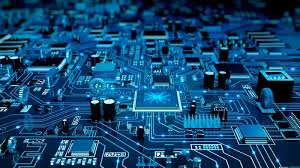

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df=pd.read_csv('data.csv',names=['vendor_name','model_name','MYCT','MMIN','MMAX','CACH',
'CHMIN','CHMAX','PRP','ERP'])
df_trn=df.copy()


In [6]:
df.head(5)

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [11]:
df.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [16]:
#segregating numerical and categorical columns 
categorical_columns=df.columns[df.dtypes=='O']
numerical_columns=df.columns[df.dtypes!='O']
print('CATEGORICAL_COLUMNS:', categorical_columns)
print('NUMERICAL_COLUMNS:',numerical_columns)

CATEGORICAL_COLUMNS: Index(['vendor_name', 'model_name'], dtype='object')
NUMERICAL_COLUMNS: Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'], dtype='object')


In [17]:
df[categorical_columns].describe()

,vendor_name,model_name
count,209,209
unique,30,209
top,ibm,32/60
freq,32,1


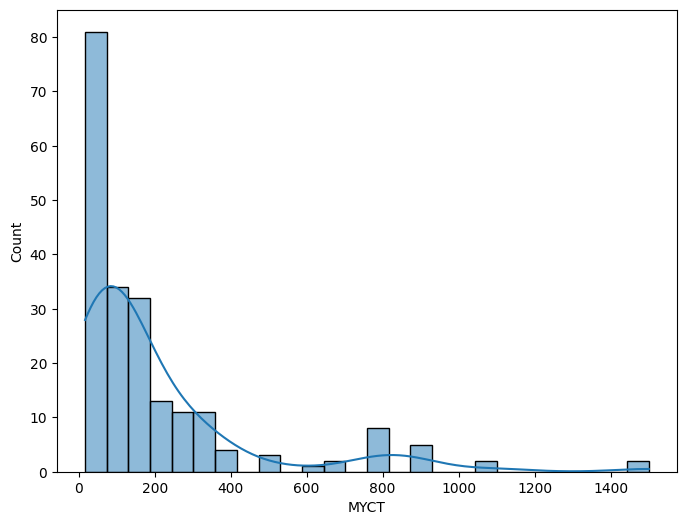

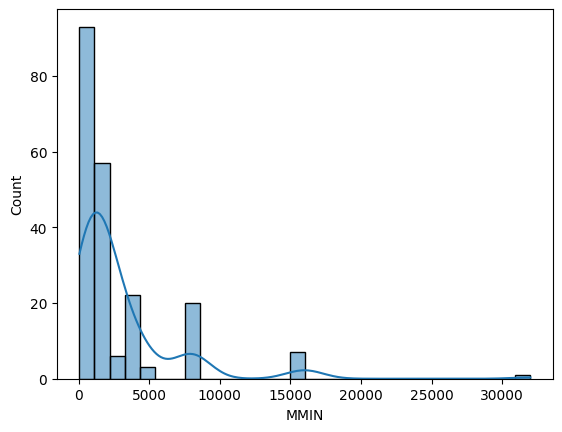

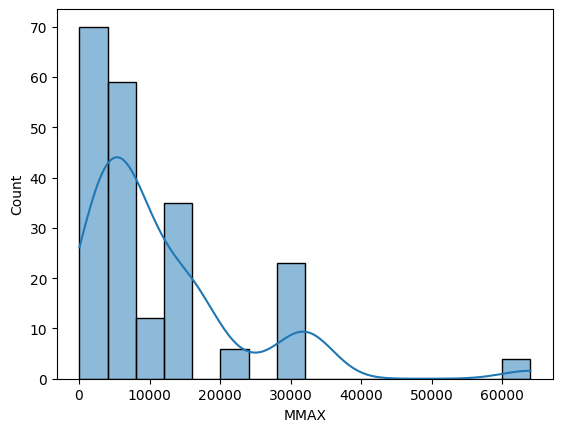

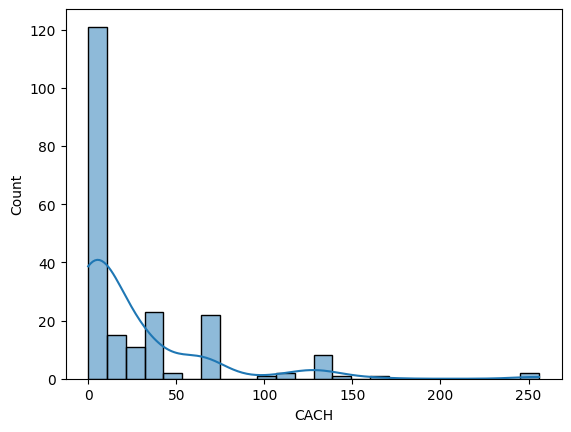

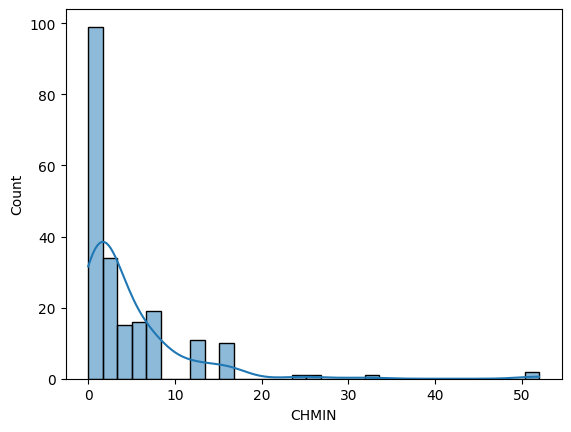

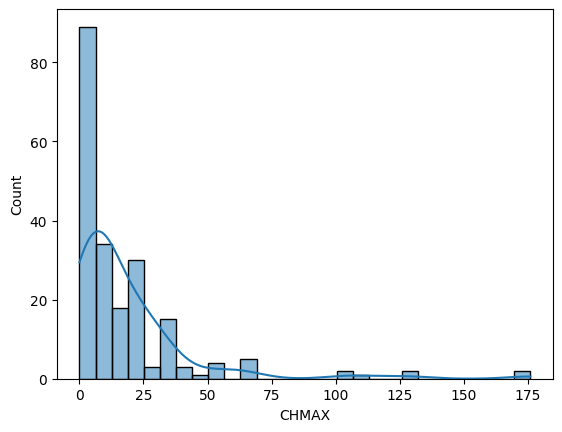

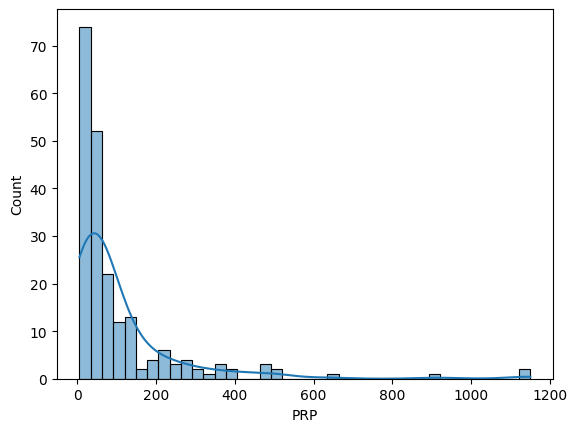

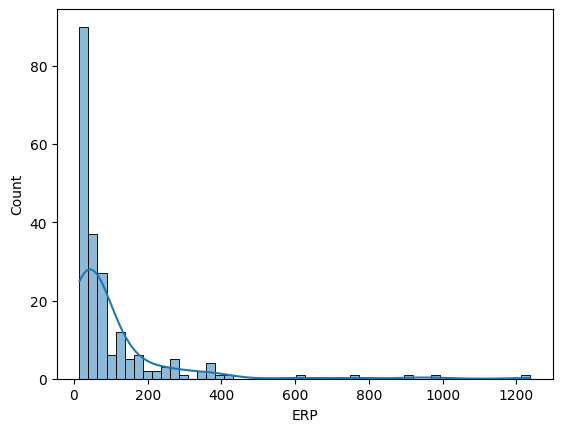

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [19]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<Axes: >

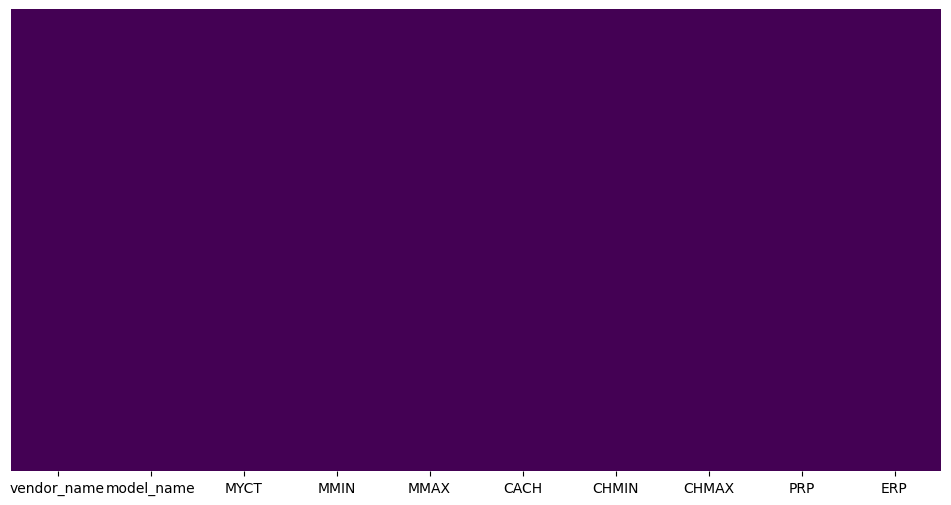

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull(), yticklabels =False, cbar=False, cmap= 'viridis')